<a href="https://colab.research.google.com/github/yosephhabtu/MC-DATA-201-Project-2/blob/main/DATA_201_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Linear Regression-Pridicting Revenue Generated From Movie Sales
## 1. Introduction:
      The Project is the second of the three projects required to complete DATA201 course. We will handle the project as a team of three:
###   1.1 Assefa will handle the introduction and the EDA parts.
###   1.2 Yoseph will handle the linear regression model section.
###   1.3 Adi will take care of model plots.

## 2. Purpose of the Project:
### 2.1 Indentify appropriate dataset and import it.
### 2.2 Carry out Exploratory Data Analysis.
### 2.3 Apply Linear Regression model to Predict Revenue from Movies
### 2.4 Evaluate the Model and Reach Conclusion.

## 3. Source of the dataset:
Internet Movie Database (IMDB); dataset derived from https://www.kaggle.com/datasets/danielgrijalvas/movies/data





In [ ]:
## 4. Load Packages:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 5. Import the Dataset:
df = pd.read_csv('https://github.com/yosephhabtu/MC-DATA-201-Project-2/raw/main/movies.csv')

## View Some Pertinent Information on the Dataset;
### View the First Five Lines of the Dataset:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
### View the Last Five Lines of the Dataset:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [ ]:
# Identifying missing values
(df.isna().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
# Dropping all rows with missing values
df = df.dropna()
df.shape

(5421, 15)

In [ ]:
# View Details of the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [ ]:
# Descriptive statistics
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


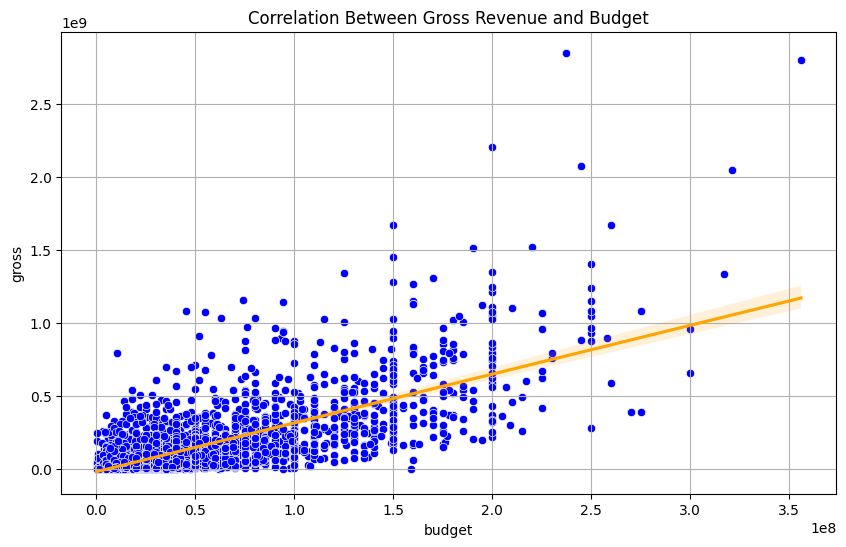

In [ ]:
# Assess the State of Linear Relationship Between the Variables
## Gross vs Budget
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='budget', y='gross', color='blue')
sns.regplot(data=df, x='budget', y='gross', scatter=False, color='orange')
plt.title('Correlation Between Gross Revenue and Budget')
plt.grid(True)
plt.show()

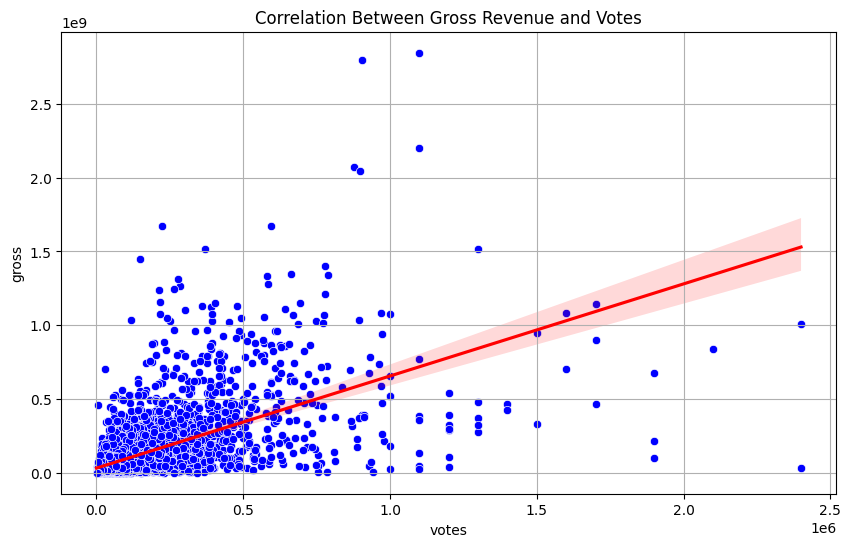

In [ ]:
## Gross vs Votes
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='votes', y='gross', color='blue')
sns.regplot(data=df, x='votes', y='gross', scatter=False, color='red')
plt.title('Correlation Between Gross Revenue and Votes')
plt.grid(True)
plt.show()

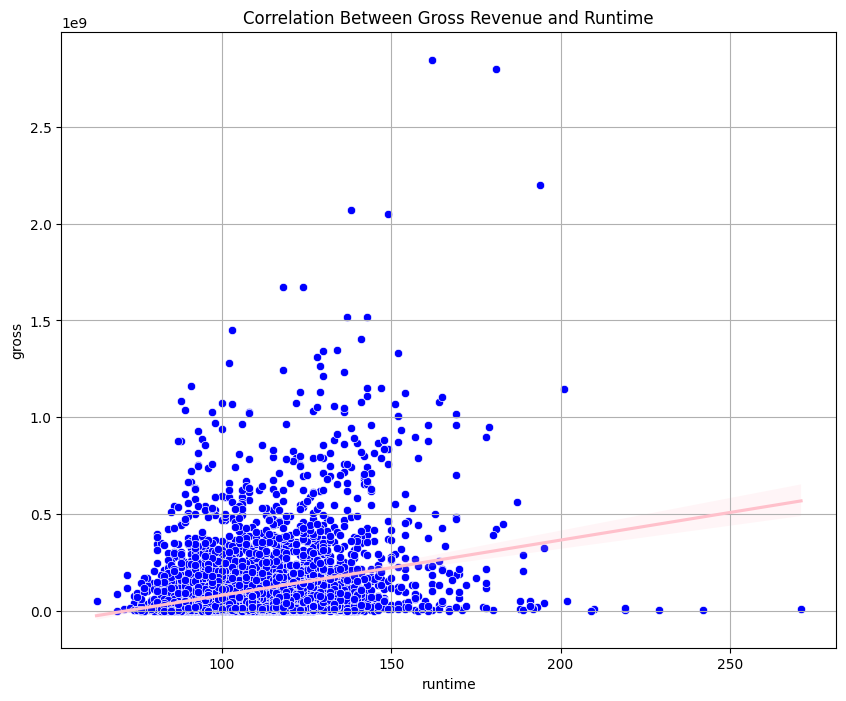

In [ ]:

## Gross Revenue and Runtime
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='runtime', y='gross', color='blue')
sns.regplot(data=df, x='runtime', y='gross', scatter=False, color='pink')
plt.title('Correlation Between Gross Revenue and Runtime')
plt.grid(True)
plt.show()

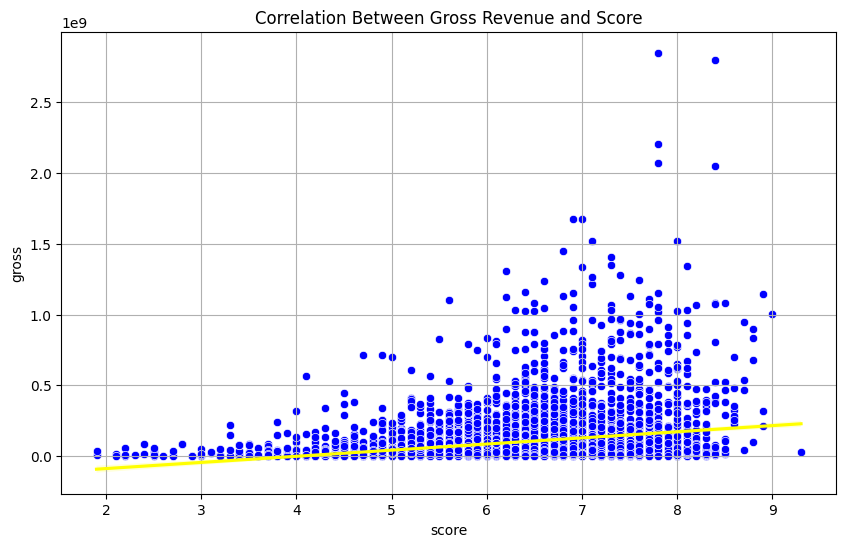

In [ ]:
## Gross vs Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='score', y='gross', color='blue')
sns.regplot(data=df, x='score', y='gross', scatter=False, color='yellow')
plt.title('Correlation Between Gross Revenue and Score')
plt.grid(True)
plt.show()

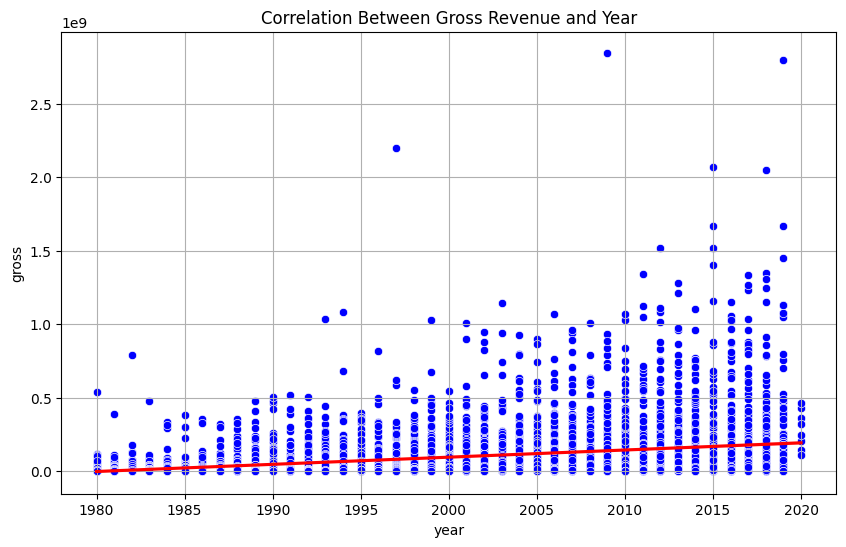

In [ ]:

## Gross vs Year
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='gross', color='blue')
sns.regplot(data=df, x='year', y='gross', scatter=False, color='red')
plt.title('Correlation Between Gross Revenue and Year')
plt.grid(True)
plt.show()

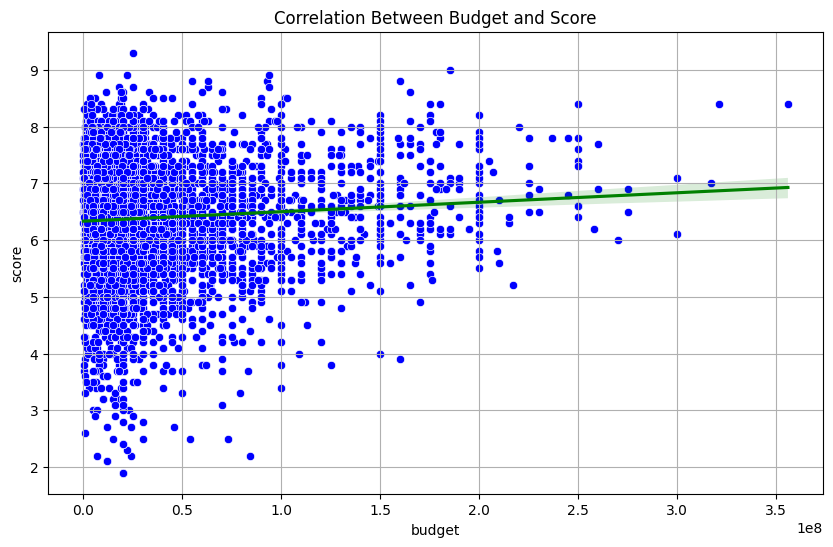

In [ ]:
## Budget vs Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='budget', y='score', color='blue')
sns.regplot(data=df, x='budget', y='score', scatter=False, color='green')
plt.title('Correlation Between Budget and Score')
plt.grid(True)
plt.show()


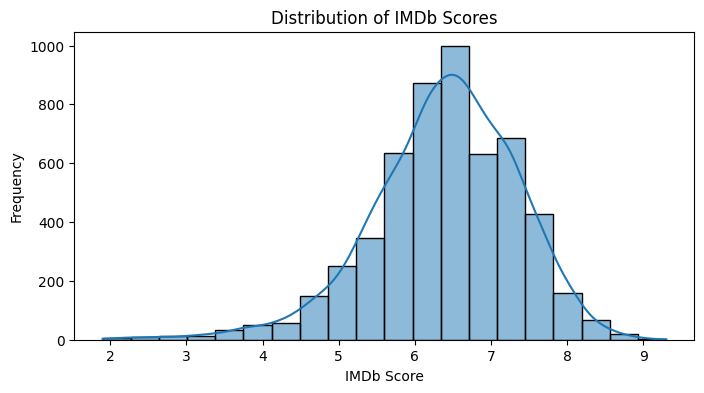

In [ ]:
# Distribution of IMDB Scores
plt.figure(figsize=(8, 4))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

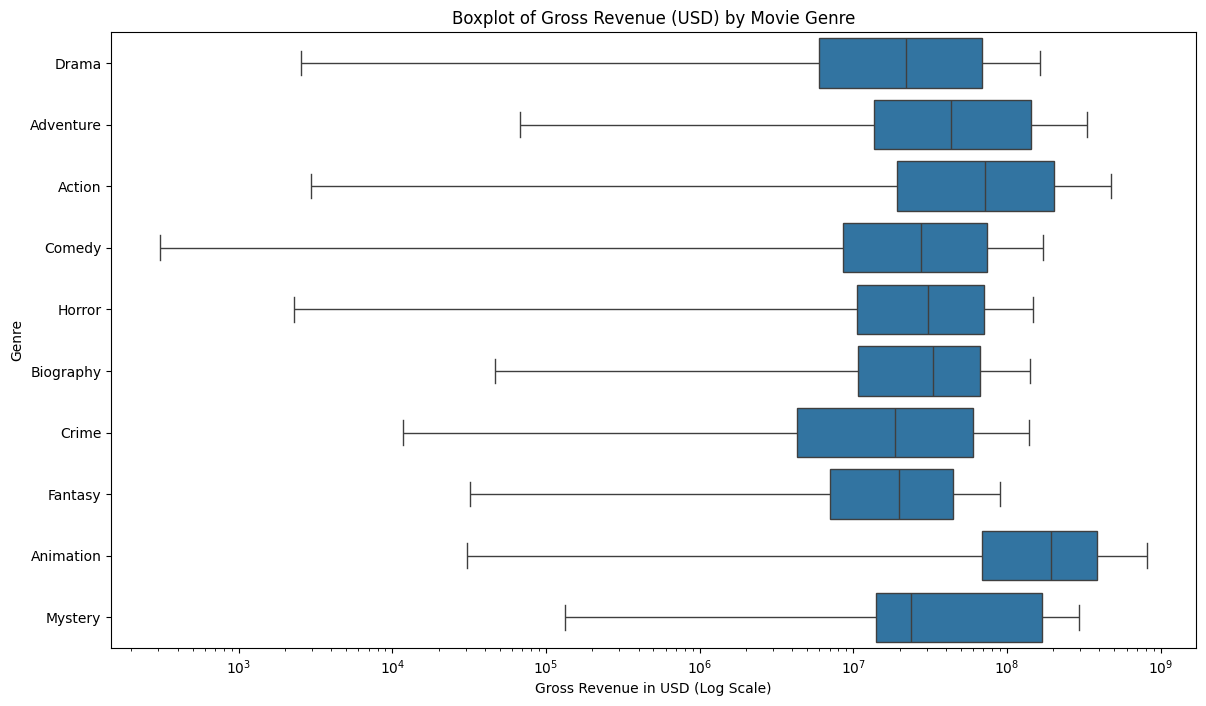

In [ ]:
# Boxplot of Gross Revenue by Genre
top_genres = df['genre'].value_counts().head(10).index
df_top_genres = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='gross', y='genre', data=df_top_genres, showfliers=False)
plt.xscale('log')
plt.title('Boxplot of Gross Revenue (USD) by Movie Genre')
plt.xlabel('Gross Revenue in USD (Log Scale)')
plt.ylabel('Genre')
plt.show()


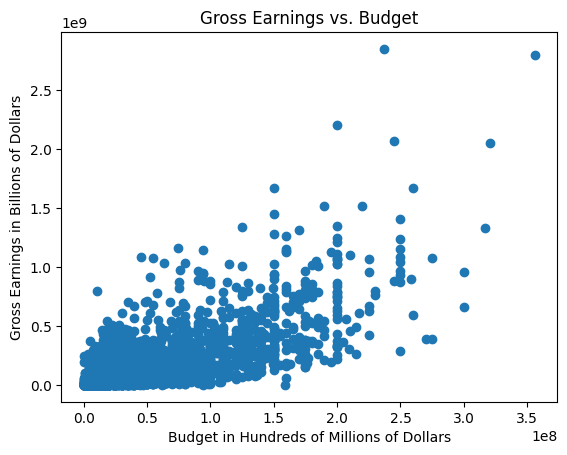

In [ ]:
# Scatterplot of Gross vs. budget

plt.scatter(df.budget,df.gross)
plt.title('Gross Earnings vs. Budget')
plt.xlabel('Budget in Hundreds of Millions of Dollars')
plt.ylabel('Gross Earnings in Billions of Dollars')
plt.show()

# Linear Regression

In [ ]:
# Defining and x and y variables for the linear regression mdoel
x = df[['budget', 'score']]
y = df['gross']
print(x.shape)
print(y.shape)

(5421, 2)
(5421,)


In [ ]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print('Shape of train data:', (x_train.shape, y_train.shape))
print('Shape of test data:', (x_test.shape, y_test.shape))

Shape of train data: ((3794, 2), (3794,))
Shape of test data: ((1627, 2), (1627,))


In [ ]:
# Fitting the the training data to a linear model
model = LinearRegression()
model.fit(x_train, y_train)

# Using the model to predict the test data
y_predicted = model.predict(x_test)

In [ ]:
# Measuring the accuracy of the model by calculating the Mean Squared Error(MSE)
mse = mean_squared_error(y_true = y_test, y_pred = y_predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.3724537175820964e+16


This high MSE value suggests the linear regression model may be a poor fit for the data. The upcoming plots will further investigate and assess the appropriateness of the model.

In [ ]:
# R-squared value
r2 = model.score(x_test, y_test)
print('R-Squared:', r2)

# Model coefficients
print(model.coef_)

R-Squared: 0.539526658787767
[3.39614169e+00 3.55820535e+07]


Evidently this model explains a decent amount of the variation (>50%) in the gross earnings of movies. However, we must now check that a linear regression is indeed appropriate.

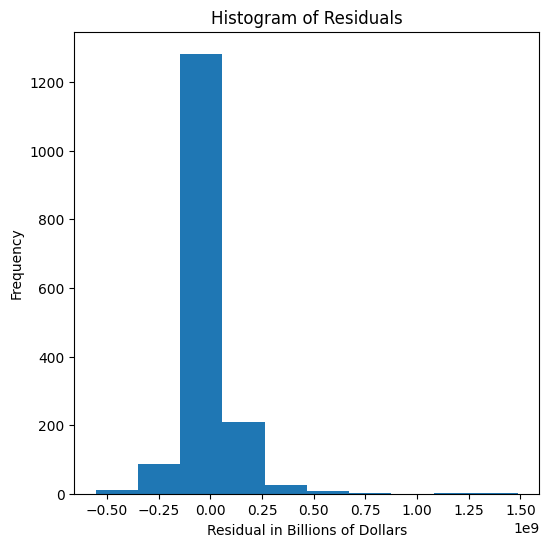

In [ ]:
# plot a histogram of the residuals
plt.figure(figsize=(6, 6))
plt.hist(y_test - y_predicted)
plt.title('Histogram of Residuals')
plt.xlabel('Residual in Billions of Dollars')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print('the highest grossing movie is:', df.name[df.gross == np.max(df.gross)])
print('the gross of the highest residual movie is:', y_test[y_test - y_predicted == max(y_test - y_predicted)])
print('there are only three movies that made this much or more:', df.gross[df.gross >= 2.2e+09])
print('the movie which this model predicts least accurately is:',df.name[3045])

the highest grossing movie is: 5445    Avatar
Name: name, dtype: object
the gross of the highest residual movie is: 3045    2.201647e+09
Name: gross, dtype: float64
there are only three movies that made this much or more: 3045    2.201647e+09
5445    2.847246e+09
7445    2.797501e+09
Name: gross, dtype: float64
the movie which this model predicts least accurately is: Titanic


According to Forbes, Avatar (2009) is indeed the highest grossing movie of all time (as of this project in April 2024), however this model has the highest prediction residual for the movie Titanic. This may be unsurprising for those who may know the history of Titanic's relatively uncertain start in the box office.

In [ ]:
import scipy.stats as scistats
scistats.shapiro(y_test-y_predicted)

ShapiroResult(statistic=0.7892231345176697, pvalue=1.286952509635912e-41)

However, the distribution of residuals is likely not Gaussian, as the Shapiro-Wilk test returns a significant p to reject the null hypothesis of normal distribution.

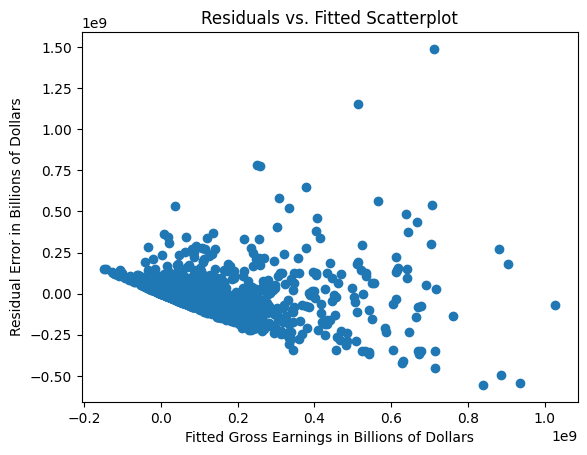

In [ ]:
# plot a scatterplot of the residuals vs. the fitted

plt.scatter(y_predicted, y_test - y_predicted)
plt.title('Residuals vs. Fitted Scatterplot')
plt.xlabel('Fitted Gross Earnings in Billions of Dollars')
plt.ylabel('Residual Error in Billions of Dollars')
plt.show()

There is a clear problem with this scatterplot. There is no clear centering of the residuals about a mean of 0, the center of the residuals seems to drop with increasing gross earnings, and so does the variance. The assumption of homoscedasticity is not met. This would seem to suggest that a linear regression is either inappropriate, or there is a binary term to be included in the regression.